# Regression

This code contains the Random Forest Regressor and the Gradient Boosting Regressor.

## Imports, data, and functions

### Imports

In [186]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.inspection import permutation_importance
from sklearn.model_selection import RandomizedSearchCV

### Dataset

The code from the plots illustrating the feature importance is taken from "https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression".

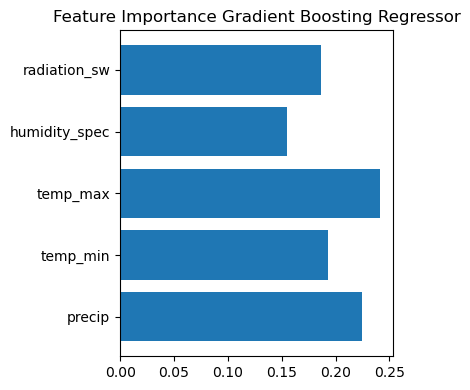

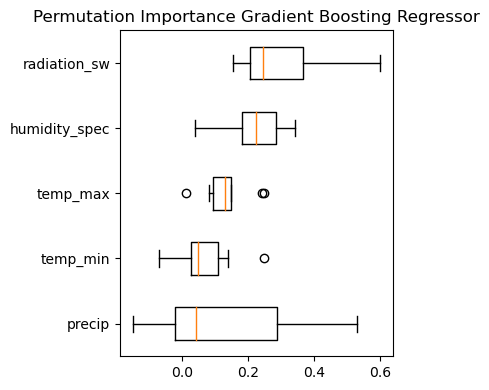

In [139]:
#Reading the datset
def read_csv_and_extract_data(csv_file):
    df = pd.read_csv(csv_file)
    y = df['streamflow'].values
    X_columns = ['precip', 'temp_min', 'temp_max', 'humidity_spec', 'radiation_sw']
    X = df[X_columns].values
    feature_names = X_columns
    return X, y, feature_names

#Splitting into test and train
X, y, feature_names = read_csv_and_extract_data('Project3_data.csv')
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
'''
scaler = MinMaxScaler()
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)
y_train = scaler.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test = scaler.transform(y_test.reshape(-1, 1)).ravel()
'''
# Illustration of dataset.
#reg = RandomForestRegressor(random_state=1)
reg = GradientBoostingRegressor(random_state=1)
reg.fit(X_train, y_train)

# Feature Importance (MDI)
feature_importance = reg.feature_importances_
pos = np.arange(feature_importance.shape[0]) + 0.5
fig = plt.figure(figsize=(7, 4))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance, align="center")
plt.yticks(pos, np.array(feature_names))
plt.title("Feature Importance Gradient Boosting Regressor")
fig.tight_layout()
plt.savefig('Importance_GBR.pdf', format='pdf', bbox_inches="tight")
plt.show()

# Permutation Importance (test set)
result = permutation_importance(reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
fig = plt.figure(figsize=(7, 4))
plt.subplot(1, 2, 2)
plt.boxplot(result.importances.T, vert=False, labels=np.array(feature_names))
plt.title("Permutation Importance Gradient Boosting Regressor")
fig.tight_layout()
plt.savefig('Permutation_GBR.pdf', format='pdf', bbox_inches="tight")
plt.show()

### Functions

In [193]:
# Plotting the results
def plot_true_vs_predicted(y_true, y_pred, set_name, label):
    if str(label) == 'Train':
        plt.scatter(y_true, y_pred, alpha=0.5, label=f'{label} set')
    else:
        plt.scatter(y_true, y_pred, alpha=0.5, label=f'{label} set', marker = '^')
    plt.title('True vs Predicted Values ' + f'{set_name}', fontsize = 10)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.xscale('log')
    plt.yscale('log')
    
    # Plot a diagonal line where y_pred equals y_true
    line = np.linspace(min(min(y_true), min(y_pred)), max(max(y_true), max(y_pred)), 100)
    if str(label) == 'Train':
        plt.plot(line, line, color='grey', linestyle='--')
    #plt.xlim(min(min(y_true)-0.1, min(y_pred)-0.1), max(max(y_true)+0.1, max(y_pred)+0.1))
    #plt.ylim(min(min(y_true)-0.1, min(y_pred)-0.1), max(max(y_true)+0.1, max(y_pred)+0.1))
    plt.legend()

## Random Forest Regressor

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=80; neg_root_mean_squared_error: (test=-0.547) r2: (test=0.118) total time=   0.0s
[CV 2/5] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=80; neg_root_mean_squared_error: (test=-0.401) r2: (test=0.090) total time=   0.0s
[CV 3/5] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=80; neg_root_mean_squared_error: (test=-0.387) r2: (test=0.111) total time=   0.0s
[CV 4/5] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=80; neg_root_mean_squared_error: (test=-0.336) r2: (test=-0.181) total time=   0.0s
[CV 5/5] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=80; neg_root_mean_squared_error: (test=-0.246) r2: (test=0.116) total time=   0.0s
RandomForestReg

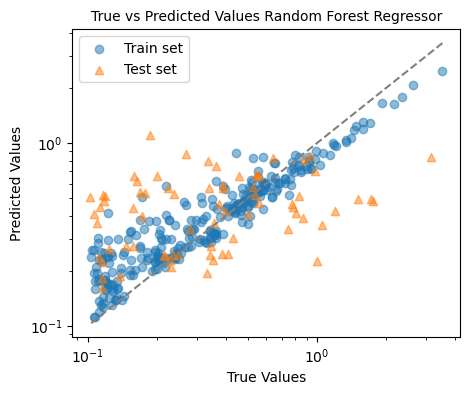

Mean Squared Error Train: 0.09022691436643836
R2 Train: 0.8829327616176789
Mean Squared Error Test: 0.30622529967465756
R2 Test: 0.0543713130904071


In [194]:
def RFR(n_estimators, max_depth):
    model = RandomForestRegressor(random_state=1)
    '''
    Random forest regressor. Consists of a number of classifying decision trees. 
    Default parameters: n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, 
    oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None.
    '''
    n_features = 5
    
    # Grid-search
    search_space = {
        "n_estimators": n_estimators, # Number of trees in the forest
        "max_depth": max_depth, # Max depth of the tree
        "min_samples_split": [2], # Min number of samples required to split an internal node
        "min_samples_leaf": [1], # Min number of samples required to be at a leaf node
        "max_features": ['log2'] # Number of features to consider when looking for the best split. Regresion: log2(n_features)
    }
    
    GridSearch = True
    if GridSearch == True:
        GS = GridSearchCV(estimator=model, param_grid=search_space, scoring=["r2","neg_root_mean_squared_error"],
                      refit="r2",cv=5,verbose=4)
        GS.fit(X_train,y_train)
        best_model = GS.best_estimator_
    else:
        RS = RandomizedSearchCV(estimator=model, param_distributions=search_space, n_iter=100,
                        scoring=["r2", "neg_root_mean_squared_error"], refit="r2", cv=5, verbose=4)
        RS.fit(X_train,y_train)
        best_model = RS.best_estimator_
    
    print(best_model) #See which model was best
    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)
    
    # Plotting the results
    fig = plt.figure(figsize=(5,4))
    plot_true_vs_predicted(y_train, y_pred_train, "Random Forest Regressor", label="Train")
    plot_true_vs_predicted(y_test, y_pred_test, "Random Forest Regressor", label="Test")
    plt.savefig('RFR.pdf', format='pdf', bbox_inches="tight")
    plt.show()
    
    # Evaluate the model
    mse_train = mean_absolute_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)
    print(f'Mean Squared Error Train: {mse_train}')
    print(f'R2 Train: {r2_train}')
    
    mse_test = mean_absolute_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)
    print(f'Mean Squared Error Test: {mse_test}')
    print(f'R2 Test: {r2_test}')

RFR([80], [None])

## Gradient Boosting Regressor

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END learning_rate=0.01, max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=300, subsample=0.8; neg_root_mean_squared_error: (test=-0.578) r2: (test=0.015) total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=300, subsample=0.8; neg_root_mean_squared_error: (test=-0.404) r2: (test=0.075) total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=300, subsample=0.8; neg_root_mean_squared_error: (test=-0.393) r2: (test=0.083) total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=300, subsample=0.8; neg_root_mean_squared_error: (test=-0.305) r2: (test=0.027) total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=5, max_features=log2, min_

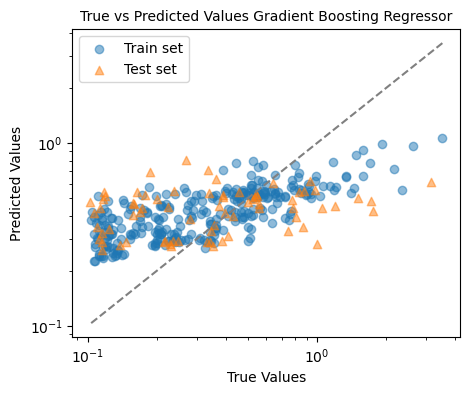

Mean Squared Error Train: 0.20179763846084586
R2 Train: 0.3921509434712269
Mean Squared Error Test: 0.29685011166377206
R2 Test: 0.048216869555048336


In [197]:
def GBR(n_estimators, learning_rate):
    model = GradientBoostingRegressor(random_state=1, validation_fraction=0.1, n_iter_no_change=50)
    '''
    Gradient boosting regressor. Additive model where a regression tre is fit on the negative graident of a loss function.
    Default parameters: loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', 
    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, 
    random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, 
    n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0.
    '''
    
    # Grid-search
    search_space = {
        "n_estimators": n_estimators, # The number of boosting stages to perform
        "learning_rate": learning_rate, # Shrinking the contribution of each tree
        "max_depth": [5], # Max depth of the tree
        "min_samples_split": [3], # Min number of samples required to split an internal node
        "min_samples_leaf": [6], # Min number of samples required to be at a leaf node
        "subsample": [0.8], # Stochastic gradient boosting if smaller than 1
        "max_features": ['log2'] # Number of features to consider when looking for the best split. Regresion: log2(n_features)
    }
    
    GridSearch = True
    if GridSearch == True:
        GS = GridSearchCV(estimator=model, param_grid=search_space, scoring=["r2","neg_root_mean_squared_error"],
                      refit="r2",cv=5,verbose=4)
        GS.fit(X_train,y_train)
        best_model = GS.best_estimator_
    else:
        RS = RandomizedSearchCV(estimator=model, param_distributions=search_space, n_iter=100,
                        scoring=["r2", "neg_root_mean_squared_error"], refit="r2", cv=5, verbose=4)
        RS.fit(X_train,y_train)
        best_model = RS.best_estimator_
    
    print(best_model) #See which model was best
    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)
    
    # Plotting the results
    fig = plt.figure(figsize=(5,4))
    plot_true_vs_predicted(y_train, y_pred_train, "Gradient Boosting Regressor", label="Train")
    plot_true_vs_predicted(y_test, y_pred_test, "Gradient Boosting Regressor", label="Test")
    plt.savefig('GBR.pdf', format='pdf', bbox_inches="tight")
    plt.show()

    # Evaluate the model
    mse_train = mean_absolute_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)
    print(f'Mean Squared Error Train: {mse_train}')
    print(f'R2 Train: {r2_train}')
    
    mse_test = mean_absolute_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)
    print(f'Mean Squared Error Test: {mse_test}')
    print(f'R2 Test: {r2_test}')

GBR([300], [0.01])

### XGBoost

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, reg_alpha=0, reg_lambda=0, subsample=0.8; neg_root_mean_squared_error: (test=-0.564) r2: (test=0.061) total time=   0.0s
[CV 2/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, reg_alpha=0, reg_lambda=0, subsample=0.8; neg_root_mean_squared_error: (test=-0.395) r2: (test=0.115) total time=   0.0s
[CV 3/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, reg_alpha=0, reg_lambda=0, subsample=0.8; neg_root_mean_squared_error: (test=-0.397) r2: (test=0.063) total time=   0.0s
[CV 4/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, reg_alpha=0, reg_lambda=0, subsample=0.8; neg_root_mean_squared_error: (test=-0.302) r2: (test=0.045) total time=  

[CV 2/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, reg_alpha=0.1, reg_lambda=0, subsample=1.0; neg_root_mean_squared_error: (test=-0.394) r2: (test=0.122) total time=   0.0s
[CV 3/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, reg_alpha=0.1, reg_lambda=0, subsample=1.0; neg_root_mean_squared_error: (test=-0.398) r2: (test=0.059) total time=   0.0s
[CV 4/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, reg_alpha=0.1, reg_lambda=0, subsample=1.0; neg_root_mean_squared_error: (test=-0.311) r2: (test=-0.010) total time=   0.0s
[CV 5/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, reg_alpha=0.1, reg_lambda=0, subsample=1.0; neg_root_mean_squared_error: (test=-0.246) r2: (test=0.115) total time=   0.0s
[CV 1/5] END colsample_bytree=0.8, gamma=0, lea

[CV 3/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, reg_alpha=0.2, reg_lambda=0.1, subsample=0.8; neg_root_mean_squared_error: (test=-0.395) r2: (test=0.070) total time=   0.0s
[CV 4/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, reg_alpha=0.2, reg_lambda=0.1, subsample=0.8; neg_root_mean_squared_error: (test=-0.303) r2: (test=0.041) total time=   0.0s
[CV 5/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, reg_alpha=0.2, reg_lambda=0.1, subsample=0.8; neg_root_mean_squared_error: (test=-0.244) r2: (test=0.130) total time=   0.0s
[CV 1/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, reg_alpha=0.2, reg_lambda=0.1, subsample=1.0; neg_root_mean_squared_error: (test=-0.560) r2: (test=0.075) total time=   0.0s
[CV 2/5] END colsample_bytree=0.8, gamma

[CV 5/5] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=1.0; neg_root_mean_squared_error: (test=-0.250) r2: (test=0.082) total time=   0.0s
[CV 1/5] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, reg_alpha=0, reg_lambda=0.2, subsample=0.8; neg_root_mean_squared_error: (test=-0.562) r2: (test=0.069) total time=   0.0s
[CV 2/5] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, reg_alpha=0, reg_lambda=0.2, subsample=0.8; neg_root_mean_squared_error: (test=-0.395) r2: (test=0.117) total time=   0.0s
[CV 3/5] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, reg_alpha=0, reg_lambda=0.2, subsample=0.8; neg_root_mean_squared_error: (test=-0.396) r2: (test=0.066) total time=   0.0s
[CV 4/5] END colsample_bytree=1.0, gamma=0, lear

[CV 4/5] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, reg_alpha=0.1, reg_lambda=0.2, subsample=1.0; neg_root_mean_squared_error: (test=-0.311) r2: (test=-0.012) total time=   0.0s
[CV 5/5] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, reg_alpha=0.1, reg_lambda=0.2, subsample=1.0; neg_root_mean_squared_error: (test=-0.249) r2: (test=0.088) total time=   0.0s
[CV 1/5] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, reg_alpha=0.2, reg_lambda=0, subsample=0.8; neg_root_mean_squared_error: (test=-0.561) r2: (test=0.072) total time=   0.0s
[CV 2/5] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, reg_alpha=0.2, reg_lambda=0, subsample=0.8; neg_root_mean_squared_error: (test=-0.395) r2: (test=0.116) total time=   0.0s
[CV 3/5] END colsample_bytree=1.0, gamma=0,

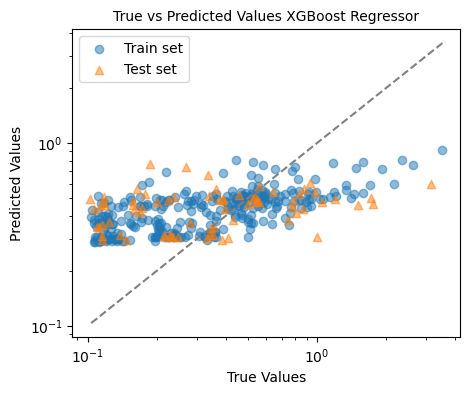

Mean Squared Error Train: 0.22270589351252987
R2 Train: 0.28531019503042343
Mean Squared Error Test: 0.29568880859981167
R2 Test: 0.06376988529351124


In [213]:
def XGB(n_estimators, learning_rate):
    model =  xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, tree_method="hist",
    eval_metric=mean_absolute_error, random_state = 1)
    '''
    XGBoost regressor. 
    '''
    
    # Grid-search
    search_space = {
        'n_estimators': [100],
        'learning_rate': [0.01],
        'max_depth': [3],
        'min_child_weight': [5],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
        'gamma': [0],
        'reg_alpha': [0, 0.1, 0.2],
        'reg_lambda': [0, 0.1, 0.2],
        }
    
    GridSearch = True
    if GridSearch == True:
        GS = GridSearchCV(estimator=model, param_grid=search_space, scoring=["r2", "neg_root_mean_squared_error"],
                      refit="r2",cv=5,verbose=4)
        GS.fit(X_train,y_train)
        best_model = GS.best_estimator_
    else:
        RS = RandomizedSearchCV(estimator=model, param_distributions=search_space, n_iter=100,
                        scoring=["r2", "neg_root_mean_squared_error"], refit="r2", cv=5, verbose=4)
        RS.fit(X_train,y_train)
        best_model = RS.best_estimator_
    
    print(best_model) #See which model was best
    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)
    
    # Plotting the results
    fig = plt.figure(figsize=(5,4))
    plot_true_vs_predicted(y_train, y_pred_train, "XGBoost Regressor", label="Train")
    plot_true_vs_predicted(y_test, y_pred_test, "XGBoost Regressor", label="Test")
    plt.savefig('XGBoost.pdf', format='pdf', bbox_inches="tight")
    plt.show()

    # Evaluate the model
    mse_train = mean_absolute_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)
    print(f'Mean Squared Error Train: {mse_train}')
    print(f'R2 Train: {r2_train}')
    
    mse_test = mean_absolute_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)
    print(f'Mean Squared Error Test: {mse_test}')
    print(f'R2 Test: {r2_test}')


XGB([150], [0.01])